## Урок 10. Работа с признаками
Вам предстоит провести эксперименты с моделью машинного обучения и изучить процесс кросс-валидации и подбора гиперпараметров.

1. Загрузите набор данных, подходящий для задачи классификации или регрессии. Вы можете использовать любой набор данных, предоставленный в библиотеке scikit-learn или другом доступном источнике данных.

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [6]:
# Загрузка набора данных
data = pd.read_csv('diabetes.xls')
X = data.drop('Outcome', axis=1).values
y = data.Outcome.values

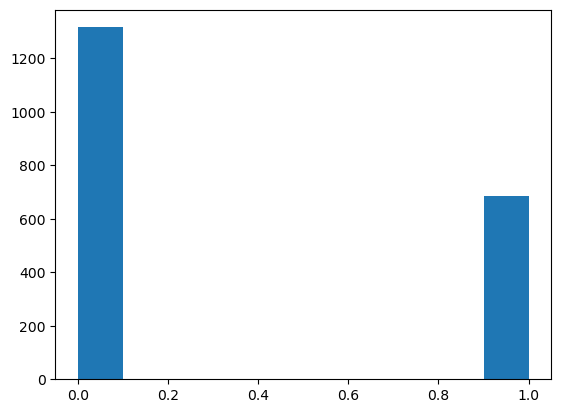

In [61]:
plt.hist(y);

2. Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.

Так как классы не сильно сбалансированы, будет использовать при разделении выборки параметр stratify

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

3. Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный лес для задачи классификации.

In [90]:
# Создание модели логистической регрессии
model = LogisticRegression()

4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).


In [91]:
# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Средняя точность на кросс-валидации: {scores.mean()}")

Средняя точность на кросс-валидации: 0.7737499999999999


5. Проведите подбор гиперпараметров модели с помощью метода GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.

In [92]:
# Определение параметров для поиска
param_grid = {'C': np.linspace(0, 1, 30).tolist(),
              'penalty': ['l1', 'l2']}

In [93]:
# Создание объекта GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [94]:
# Поиск оптимальных гиперпараметров
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.034482758620689655, 0.06896551724137931,
                               0.10344827586206896, 0.13793103448275862,
                               0.1724137931034483, 0.20689655172413793,
                               0.24137931034482757, 0.27586206896551724,
                               0.3103448275862069, 0.3448275862068966,
                               0.3793103448275862, 0.41379310344827586,
                               0.4482758620689655, 0.48275862068965514,
                               0.5172413793103449, 0.5517241379310345,
                               0.5862068965517241, 0.6206896551724138,
                               0.6551724137931034, 0.6896551724137931,
                               0.7241379310344828, 0.7586206896551724,
                               0.7931034482758621, 0.8275862068965517,
                               0.8620689655172413, 0.896551724137931,
                               0.9310344827586207, 0.9655172413793103, 1.0],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [95]:
# Вывод лучших найденных гиперпараметров
print(f"Лучшие гиперпараметры: {grid_search.best_params_}")

Лучшие гиперпараметры: {'C': 0.6206896551724138, 'penalty': 'l2'}


6. Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.


In [96]:
# Обучение модели с оптимальными гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

LogisticRegression(C=0.6206896551724138)

In [129]:
# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

In [98]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       294
           1       0.60      0.77      0.67       106

    accuracy                           0.80       400
   macro avg       0.75      0.79      0.77       400
weighted avg       0.83      0.80      0.81       400



Значение метрики accuracy из отчета показывает, что модель правильно классифицировала 91% отрицательных случаев и 60 % полодительных. 

7. Проведите анализ результатов и сделай выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.

Кросс-валидация позволяет оценить обобщающую способность модели, избегая переобучения на обучающей выборке. Для модели логистическое регрессии средняя accuracy при 5-ти кратной кроссвалидации составила 77%. Подбор гиперпараметров с помощью GridSearchCV помог немного оптимизировать модель, теперь среднне по классам метрика accuracy составила 80%, то есть улучшилась на 3%. Однако accuracy на положительном классе составляет всего 60% , что недопустимо для медицинских данных. Проделаем все те же шаги с моделью RandomForestClassifier.

In [128]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [104]:
# Кросс-валидация
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Средняя точность на кросс-валидации: {scores_rf.mean()}")

Средняя точность на кросс-валидации: 0.9568749999999999


In [119]:
 [int(x) for x in np.linspace(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [138]:
# Определение параметров для поиска
param_grid_rf = {'max_depth': [10, 12, 14, 16, 18], 'max_features' : [2,3,4,5], 'n_estimators' : [int(x) for x in np.linspace(20, 110, 10)]}

In [139]:
# Создание объекта GridSearchCV
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5,  scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
# Вывод лучших найденных гиперпараметров
print(f"Лучшие гиперпараметры: {grid_search_rf.best_params_}")

Лучшие гиперпараметры: {'max_depth': 14, 'max_features': 4, 'n_estimators': 90}


In [140]:
# Обучение модели с оптимальными гиперпараметрами
best_model = grid_search_rf.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, max_features=4, n_estimators=90)

In [141]:
# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

In [142]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       263
           1       0.98      0.98      0.98       137

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Для модели случайного лева средняя accuracy при 5-ти кратной кроссвалидации уже составила 96%. Подбор гиперпараметров с помощью GridSearchCV помог увеличить средннюю по классам метрику accuracy на 2% до 98%. Таким несмотря на возможности найстойки модели, логистическая регрессия дала худший результат, чем случайный лес.